In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('standard_marketing_campaign.csv')
df.sample(5)

,Recency,Frequency,Monetary
641,-0.452900,2.421927,1.810054
822,-0.902103,-1.177750,-0.967422
795,0.445535,-0.763956,-0.757093
1673,-0.383744,-0.879644,-0.928026
508,1.516713,0.024686,-0.398787


In [ ]:
df1 = pd.read_csv('cleaned_marketing_campaign.csv')
df1.sample(5)

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Member_Year,Age,Kids,Total_Transactions,Total_Purchases,Campaign_Acc
762,3,1,62058000.0,52,301000,7000,74000,10000,0,58000,...,0,0,0,0,1,66,1,450000,14,0
1282,2,1,52531000.0,68,283000,112000,151000,51000,72000,125000,...,0,0,0,0,0,51,0,794000,19,0
203,3,0,18890000.0,5,6000,4000,1000,7000,2000,15000,...,0,0,0,1,0,38,0,35000,3,1
1360,3,0,41335000.0,24,112000,19000,21000,16000,14000,5000,...,0,0,0,0,1,54,1,187000,9,0
2097,3,1,58646000.0,3,62000,1000,44000,6000,5000,22000,...,0,0,0,0,1,60,1,140000,7,0


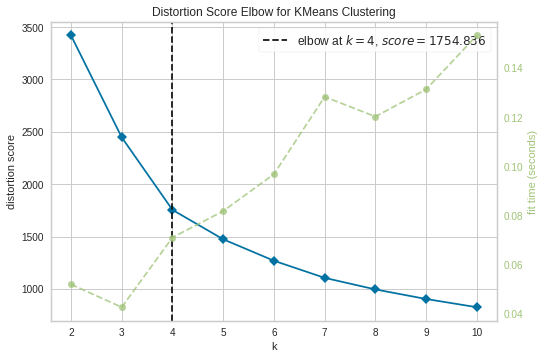

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [ ]:
cluster = KMeans(n_clusters=4, random_state=0).fit(df)

df['Segment'] = cluster.labels_
df

,Recency,Frequency,Monetary,Segment
0,0.307341,1.220083,1.599462,2
1,-0.383789,-1.167420,-0.956309,1
2,-0.798417,1.043752,0.275266,3
3,-0.798440,-0.900752,-0.918679,1
4,1.551248,0.206481,-0.324553,0
...,...,...,...,...
2224,-0.107332,0.441836,1.172991,3
2225,0.238171,0.298901,-0.190736,0
2226,1.447582,0.781458,1.171992,2
2227,-1.420417,1.201032,0.389028,3


In [ ]:
rfm_avg = df.groupby('Segment').agg({'Recency':'mean',
                                     'Frequency': 'mean',
                                     'Monetary':'mean'}).reset_index()
rfm_avg

,Segment,Recency,Frequency,Monetary
0,0,0.871196,-0.749525,-0.745728
1,1,-0.852808,-0.797014,-0.772223
2,2,0.808777,0.971060,0.996467
3,3,-0.928095,0.956886,0.889907


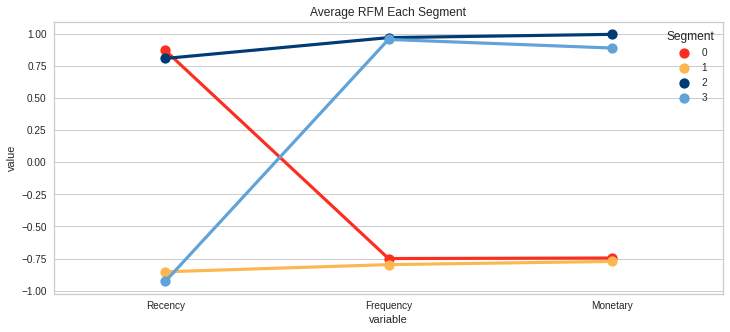

In [ ]:
col = ['#FC2E20','#FDB750', '#003B73','#60A3D9']
snake_plot = pd.melt(rfm_avg, id_vars='Segment', value_vars=['Recency', 'Frequency', 'Monetary'])

plt.figure(figsize=(12,5))
sns.pointplot(x="variable", y="value", hue="Segment",
                   data=snake_plot, palette=col)
plt.title('Average RFM Each Segment')
plt.show()

In [ ]:
df3 = df1.copy()
df3['Segment'] = cluster.labels_
df3

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Member_Year,Age,Kids,Total_Transactions,Total_Purchases,Campaign_Acc,Segment
0,2,0,58138000.0,58,635000,88000,546000,172000,88000,88000,...,0,0,1,0,65,0,1617000,22,0,2
1,2,0,46344000.0,38,11000,1000,6000,2000,1000,6000,...,0,0,0,2,68,2,27000,4,0,1
2,2,1,71613000.0,26,426000,49000,127000,111000,21000,42000,...,0,0,0,1,57,0,776000,20,0,3
3,2,1,26646000.0,26,11000,4000,20000,10000,3000,5000,...,0,0,0,2,38,1,53000,6,0,1
4,4,1,58293000.0,94,173000,43000,118000,46000,27000,15000,...,0,0,0,2,41,1,422000,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2,1,61223000.0,46,709000,43000,182000,42000,118000,247000,...,0,0,0,1,55,1,1341000,16,0,3
2225,4,1,64014000.0,56,406000,0,30000,0,0,8000,...,0,0,0,2,76,3,444000,15,1,0
2226,2,0,56981000.0,91,908000,48000,217000,32000,12000,24000,...,0,0,0,2,41,0,1241000,18,1,2
2227,3,1,69245000.0,8,428000,30000,214000,80000,30000,61000,...,0,0,0,2,66,1,843000,21,0,3


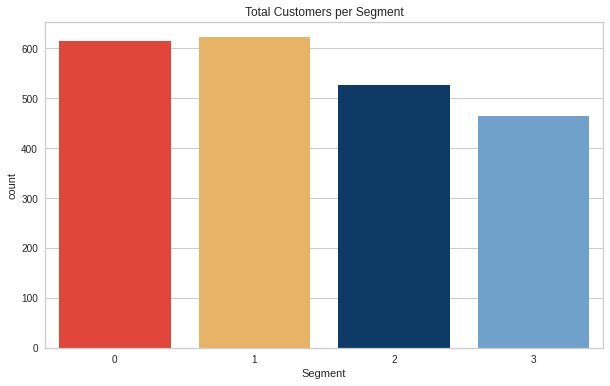

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df3['Segment'], palette=col)
plt.title('Total Customers per Segment')
plt.show()

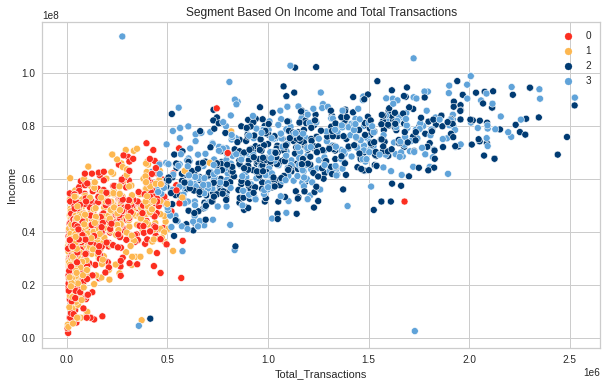

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df3,x='Total_Transactions', 
                y='Income', hue='Segment', palette=col)
plt.title('Segment Based On Income and Total Transactions')
plt.legend()
plt.show()

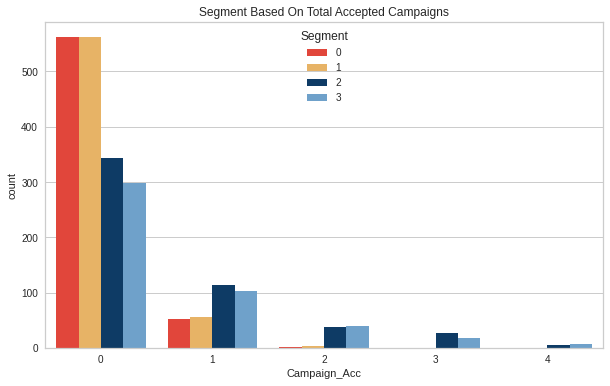

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3, x="Campaign_Acc", hue="Segment", palette=col)
plt.title("Segment Based On Total Accepted Campaigns")
plt.show()

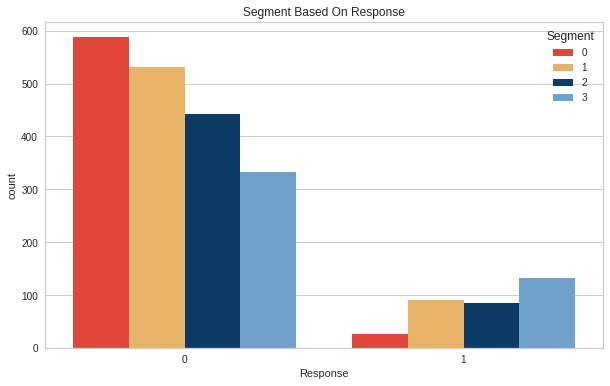

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3, x = 'Response', hue = 'Segment', palette=col)
plt.title('Segment Based On Response')
plt.show()

<Figure size 576x396 with 0 Axes>

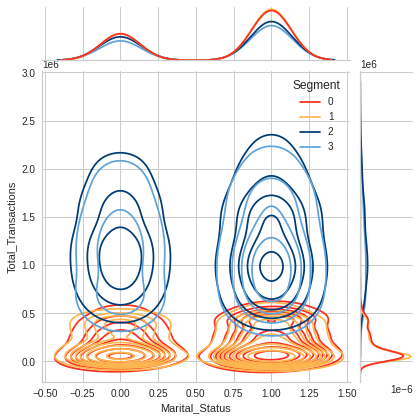

<Figure size 576x396 with 0 Axes>

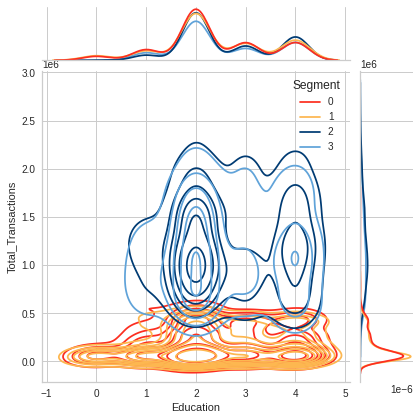

<Figure size 576x396 with 0 Axes>

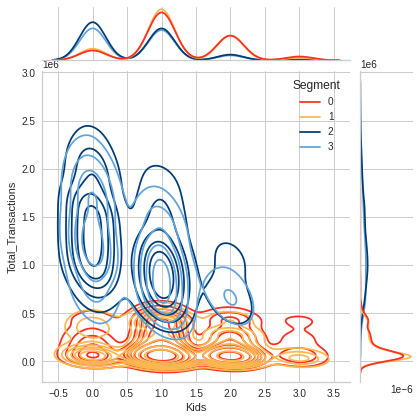

<Figure size 576x396 with 0 Axes>

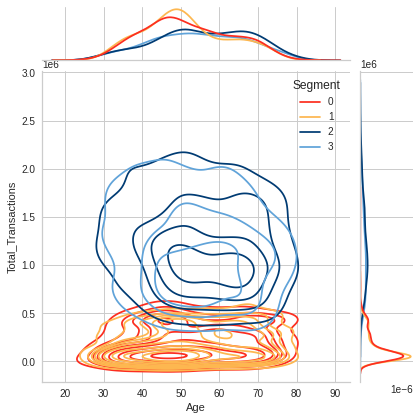

<Figure size 576x396 with 0 Axes>

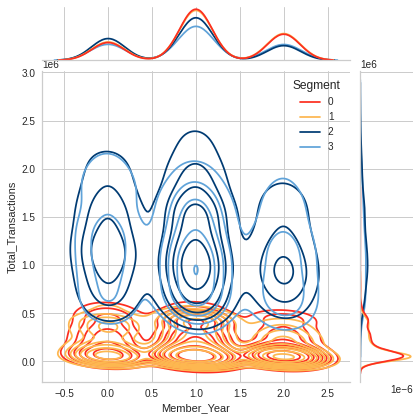

In [ ]:
Demographic = [ 'Marital_Status', 'Education', 'Kids', 'Age', 'Member_Year']

for i in Demographic:
    plt.figure()
    sns.jointplot(x=df3[i], y=df3['Total_Transactions'], hue =df3['Segment'], kind="kde", palette=col)
    plt.show()

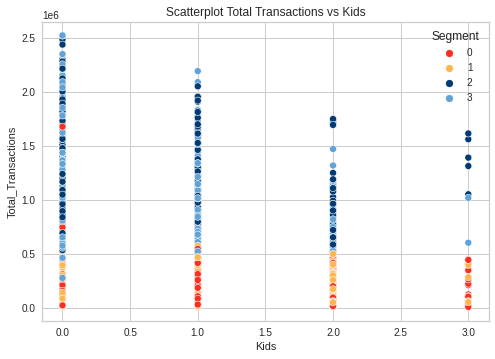

In [ ]:
sns.scatterplot(data=df3, x='Kids', y='Total_Transactions', hue='Segment', palette=col)
plt.title('Scatterplot Total Transactions vs Kids')
plt.show()